In [1]:
import sys
sys.path.append('/root/userspace/assignment/dl4us/src')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time

import dataset
from cluster import Cluster, AutoEncoder
from dec import DEC
from vade import VaDE

In [2]:
def show_result(accs, nmis, aris):
    print('Median of scores: acc: {:.3f}, nmi: {:.3f}, ari: {:.3f}'.format(np.median(accs), np.median(nmis), np.median(aris)))
    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_subplot(1, 3, 1)
    ax.boxplot(accs)
    ax.set_title('Socres of acc')
    ax = fig.add_subplot(1, 3, 2)
    ax.boxplot(nmis)
    ax.set_title('Socres of nmi')
    ax = fig.add_subplot(1, 3, 3)
    ax.boxplot(aris)
    ax.set_title('Socres of ari')
    plt.show()

In [3]:
result_df = pd.DataFrame(columns=['data', 'model', 'acc', 'nmi', 'ari', 'elapsed_time'])
loop_sets = []

# Fashion MNIST

In [4]:
x_train, y_train = dataset.load()
print('Shape of x_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)

Shape of x_train: (70000, 28, 28, 1)
Shape of y_train: (70000,)


## k-means

Elapsed time: 88.825, Scores: acc: 0.476, nmi: 0.512, ari: 0.349
Elapsed time: 82.425, Scores: acc: 0.540, nmi: 0.512, ari: 0.374
Elapsed time: 78.507, Scores: acc: 0.476, nmi: 0.512, ari: 0.349
Elapsed time: 82.135, Scores: acc: 0.476, nmi: 0.512, ari: 0.349
Elapsed time: 71.950, Scores: acc: 0.473, nmi: 0.512, ari: 0.348
Elapsed time: 75.292, Scores: acc: 0.552, nmi: 0.529, ari: 0.385
Elapsed time: 71.598, Scores: acc: 0.540, nmi: 0.512, ari: 0.374
Elapsed time: 81.670, Scores: acc: 0.476, nmi: 0.512, ari: 0.349
Elapsed time: 77.188, Scores: acc: 0.476, nmi: 0.512, ari: 0.349
Elapsed time: 82.668, Scores: acc: 0.476, nmi: 0.512, ari: 0.349
Median of scores: acc: 0.476, nmi: 0.512, ari: 0.349


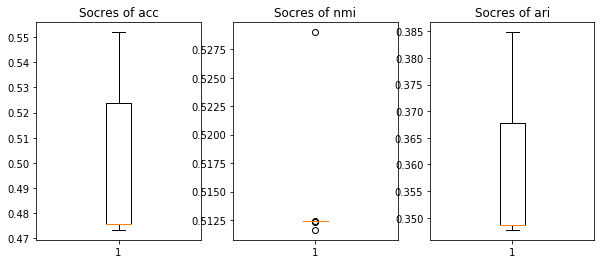

In [5]:
accs, nmis, aris = [], [], []
for _ in range(10):
    s_time = time()
    cluster = Cluster()
    scores = cluster.fit(x_train.reshape((len(x_train), -1)), y_train, verbose=0)
    accs.append(scores['acc'])
    nmis.append(scores['nmi'])
    aris.append(scores['ari'])
    elapsed_time = time() - s_time
    print('Elapsed time: {:.3f}, Scores: acc: {:.3f}, nmi: {:.3f}, ari: {:.3f}'.format(
        elapsed_time, scores['acc'], scores['nmi'], scores['ari']))
    result_df = result_df.append(
        {'data': 'f-mnist', 'model': 'K-Means',
         'acc': scores['acc'], 'nmi': scores['nmi'], 'ari': scores['ari'], 'elapsed_time': elapsed_time
        }, ignore_index=True
    )
show_result(accs, nmis, aris)

## AutoEncoder + k-means

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Elapsed time: 295.318, Scores: acc: 0.564, nmi: 0.580, ari: 0.439
Elapsed time: 507.115, Scores: acc: 0.572, nmi: 0.568, ari: 0.421
Elapsed time: 720.627, Scores: acc: 0.537, nmi: 0.551, ari: 0.387
Elapsed time: 933.761, Scores: acc: 0.595, nmi: 0.577, ari: 0.447
Elapsed time: 1149.239, Scores: acc: 0.595, nmi: 0.578, ari: 0.444
Elapsed time: 1365.052, Scores: acc: 0.546, nmi: 0.557, ari: 0.390
Elapsed time: 1581.845, Scores: acc: 0.570, nmi: 0.572, ari: 0.418
Elapsed time: 1801.444, Scores: acc: 0.573, nmi: 0.579, ari: 0.431
Elapsed time: 2021.373, Scores: acc: 0.565, nmi: 0.576, ari: 0.431
Elapsed time: 2241.586, Scores: acc: 0.536, nmi: 0.544, ari: 0.378
Median of scores: acc: 0.567, nmi: 0.574, ari: 0.426


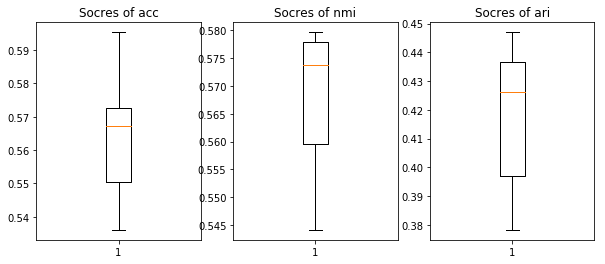

In [6]:
accs, nmis, aris = [], [], []
for _ in range(10):
    cluster = AutoEncoder()
    scores = cluster.fit(x_train.reshape((len(x_train), -1)), y_train, verbose=0)
    accs.append(scores['acc'])
    nmis.append(scores['nmi'])
    aris.append(scores['ari'])
    elapsed_time = time() - s_time
    print('Elapsed time: {:.3f}, Scores: acc: {:.3f}, nmi: {:.3f}, ari: {:.3f}'.format(
        elapsed_time, scores['acc'], scores['nmi'], scores['ari']))
    result_df = result_df.append(
        {'data': 'f-mnist', 'model': 'AE+K-Means',
         'acc': scores['acc'], 'nmi': scores['nmi'], 'ari': scores['ari'], 'elapsed_time': elapsed_time
        }, ignore_index=True
    )
show_result(accs, nmis, aris)

## DEC

Instructions for updating:
Use tf.cast instead.
Elapsed time: 2959.103, Scores: acc: 0.587, nmi: 0.640, ari: 0.485
Elapsed time: 3705.996, Scores: acc: 0.597, nmi: 0.628, ari: 0.464
Elapsed time: 4386.100, Scores: acc: 0.586, nmi: 0.627, ari: 0.457
Elapsed time: 5094.505, Scores: acc: 0.581, nmi: 0.656, ari: 0.481
Elapsed time: 6101.822, Scores: acc: 0.588, nmi: 0.624, ari: 0.467
Elapsed time: 6801.147, Scores: acc: 0.614, nmi: 0.636, ari: 0.475
Elapsed time: 7604.928, Scores: acc: 0.524, nmi: 0.621, ari: 0.431
Elapsed time: 8363.463, Scores: acc: 0.633, nmi: 0.660, ari: 0.502
Elapsed time: 9168.164, Scores: acc: 0.617, nmi: 0.634, ari: 0.477
Elapsed time: 9999.040, Scores: acc: 0.587, nmi: 0.625, ari: 0.459
Median of scores: acc: 0.587, nmi: 0.631, ari: 0.471


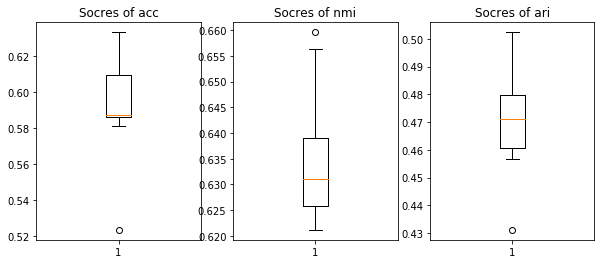

In [7]:
accs, nmis, aris = [], [], []
for _ in range(10):
    cluster = DEC(dims=(784, 500, 500, 2000, 10), pretrain_epochs=300)
    scores = cluster.fit(x_train.reshape((len(x_train), -1)), y_train, verbose=0)
    accs.append(scores['acc'])
    nmis.append(scores['nmi'])
    aris.append(scores['ari'])
    elapsed_time = time() - s_time
    print('Elapsed time: {:.3f}, Scores: acc: {:.3f}, nmi: {:.3f}, ari: {:.3f}'.format(
        elapsed_time, scores['acc'], scores['nmi'], scores['ari']))
    result_df = result_df.append(
        {'data': 'f-mnist', 'model': 'DEC',
         'acc': scores['acc'], 'nmi': scores['nmi'], 'ari': scores['ari'], 'elapsed_time': elapsed_time
        }, ignore_index=True
    )
show_result(accs, nmis, aris)

## VaDE

Elapsed time: 10785.830, Scores: acc: 0.574, nmi: 0.607, ari: 0.438
Elapsed time: 11581.532, Scores: acc: 0.609, nmi: 0.615, ari: 0.465
Elapsed time: 12394.804, Scores: acc: 0.615, nmi: 0.675, ari: 0.504
Elapsed time: 13217.933, Scores: acc: 0.659, nmi: 0.672, ari: 0.540
Elapsed time: 14054.316, Scores: acc: 0.670, nmi: 0.670, ari: 0.527
Elapsed time: 14903.982, Scores: acc: 0.612, nmi: 0.645, ari: 0.484
Elapsed time: 15769.371, Scores: acc: 0.639, nmi: 0.646, ari: 0.496
Elapsed time: 16646.007, Scores: acc: 0.573, nmi: 0.590, ari: 0.430
Elapsed time: 17540.978, Scores: acc: 0.630, nmi: 0.637, ari: 0.482
Elapsed time: 18450.686, Scores: acc: 0.549, nmi: 0.612, ari: 0.449
Median of scores: acc: 0.614, nmi: 0.641, ari: 0.483


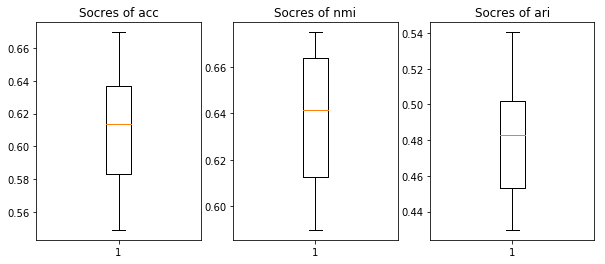

In [8]:
accs, nmis, aris = [], [], []
for _ in range(10):
    cluster = VaDE(
        n_clusters=10, input_dim = 784, hidden_dim = [500, 500, 2000], latent_dim = 10,
        act='relu', epochs=100, pretrain_epochs=100, batch_size=200, lr=0.002,
    )
    scores = cluster.fit(x_train.reshape((len(x_train), -1)), y_train, verbose=0)
    accs.append(scores['acc'])
    nmis.append(scores['nmi'])
    aris.append(scores['ari'])
    elapsed_time = time() - s_time
    print('Elapsed time: {:.3f}, Scores: acc: {:.3f}, nmi: {:.3f}, ari: {:.3f}'.format(
        elapsed_time, scores['acc'], scores['nmi'], scores['ari']))
    result_df = result_df.append(
        {'data': 'f-mnist', 'model': 'VaDE',
         'acc': scores['acc'], 'nmi': scores['nmi'], 'ari': scores['ari'], 'elapsed_time': elapsed_time
        }, ignore_index=True
    )
show_result(accs, nmis, aris)

# MNIST

In [9]:
x_train, y_train = dataset.load('mnist')
print('Shape of x_train:', x_train.shape)
print('Shape of y_train:', y_train.shape)

Shape of x_train: (70000, 28, 28, 1)
Shape of y_train: (70000,)


## K-Means

Elapsed time: 103.071, Scores: acc: 0.533, nmi: 0.500, ari: 0.366
Elapsed time: 113.560, Scores: acc: 0.542, nmi: 0.485, ari: 0.365
Elapsed time: 107.338, Scores: acc: 0.543, nmi: 0.483, ari: 0.362
Elapsed time: 106.507, Scores: acc: 0.542, nmi: 0.484, ari: 0.362
Elapsed time: 111.683, Scores: acc: 0.533, nmi: 0.500, ari: 0.365
Elapsed time: 108.559, Scores: acc: 0.533, nmi: 0.500, ari: 0.366
Elapsed time: 114.079, Scores: acc: 0.535, nmi: 0.500, ari: 0.367
Elapsed time: 96.978, Scores: acc: 0.533, nmi: 0.500, ari: 0.366
Elapsed time: 106.471, Scores: acc: 0.543, nmi: 0.483, ari: 0.362
Elapsed time: 108.302, Scores: acc: 0.542, nmi: 0.485, ari: 0.365
Median of scores: acc: 0.538, nmi: 0.492, ari: 0.365


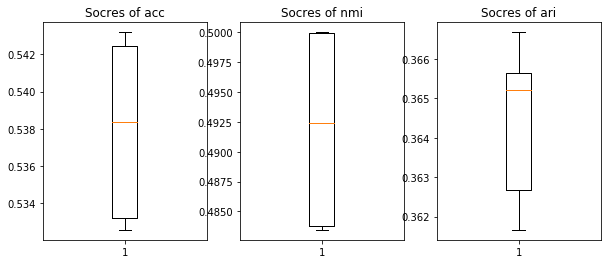

In [10]:
accs, nmis, aris = [], [], []
for _ in range(10):
    s_time = time()
    cluster = Cluster()
    scores = cluster.fit(x_train.reshape((len(x_train), -1)), y_train, verbose=0)
    accs.append(scores['acc'])
    nmis.append(scores['nmi'])
    aris.append(scores['ari'])
    elapsed_time = time() - s_time
    print('Elapsed time: {:.3f}, Scores: acc: {:.3f}, nmi: {:.3f}, ari: {:.3f}'.format(
        elapsed_time, scores['acc'], scores['nmi'], scores['ari']))
    result_df = result_df.append(
        {'data': 'mnist', 'model': 'K-Means',
         'acc': scores['acc'], 'nmi': scores['nmi'], 'ari': scores['ari'], 'elapsed_time': elapsed_time
        }, ignore_index=True
    )
show_result(accs, nmis, aris)

## AE+K-Means

Elapsed time: 373.167, Scores: acc: 0.818, nmi: 0.742, ari: 0.691
Elapsed time: 639.598, Scores: acc: 0.758, nmi: 0.718, ari: 0.655
Elapsed time: 905.657, Scores: acc: 0.691, nmi: 0.703, ari: 0.603
Elapsed time: 1174.426, Scores: acc: 0.748, nmi: 0.670, ari: 0.587
Elapsed time: 1444.792, Scores: acc: 0.817, nmi: 0.744, ari: 0.704
Elapsed time: 1714.623, Scores: acc: 0.819, nmi: 0.745, ari: 0.711
Elapsed time: 1987.338, Scores: acc: 0.816, nmi: 0.751, ari: 0.708
Elapsed time: 2261.138, Scores: acc: 0.746, nmi: 0.709, ari: 0.638
Elapsed time: 2534.617, Scores: acc: 0.743, nmi: 0.707, ari: 0.627
Elapsed time: 2810.132, Scores: acc: 0.880, nmi: 0.768, ari: 0.753
Median of scores: acc: 0.787, nmi: 0.730, ari: 0.673


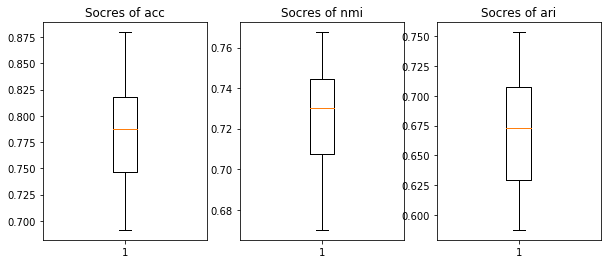

In [11]:
accs, nmis, aris = [], [], []
for _ in range(10):
    cluster = AutoEncoder()
    scores = cluster.fit(x_train.reshape((len(x_train), -1)), y_train, verbose=0)
    accs.append(scores['acc'])
    nmis.append(scores['nmi'])
    aris.append(scores['ari'])
    elapsed_time = time() - s_time
    print('Elapsed time: {:.3f}, Scores: acc: {:.3f}, nmi: {:.3f}, ari: {:.3f}'.format(
        elapsed_time, scores['acc'], scores['nmi'], scores['ari']))
    result_df = result_df.append(
        {'data': 'mnist', 'model': 'AE+K-Means',
         'acc': scores['acc'], 'nmi': scores['nmi'], 'ari': scores['ari'], 'elapsed_time': elapsed_time
        }, ignore_index=True
    )
show_result(accs, nmis, aris)

## DEC

Elapsed time: 3695.988, Scores: acc: 0.960, nmi: 0.901, ari: 0.915
Elapsed time: 4625.238, Scores: acc: 0.961, nmi: 0.902, ari: 0.916
Elapsed time: 5562.215, Scores: acc: 0.960, nmi: 0.901, ari: 0.914
Elapsed time: 6509.378, Scores: acc: 0.953, nmi: 0.890, ari: 0.899
Elapsed time: 7530.690, Scores: acc: 0.887, nmi: 0.846, ari: 0.818
Elapsed time: 8545.420, Scores: acc: 0.926, nmi: 0.864, ari: 0.855
Elapsed time: 9570.319, Scores: acc: 0.893, nmi: 0.854, ari: 0.828
Elapsed time: 10587.798, Scores: acc: 0.834, nmi: 0.852, ari: 0.804
Elapsed time: 11635.422, Scores: acc: 0.928, nmi: 0.871, ari: 0.863
Elapsed time: 12676.545, Scores: acc: 0.878, nmi: 0.854, ari: 0.825
Median of scores: acc: 0.927, nmi: 0.867, ari: 0.859


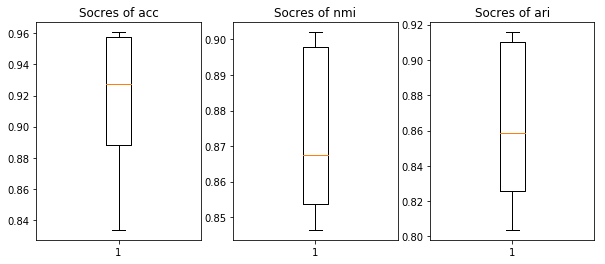

In [12]:
accs, nmis, aris = [], [], []
for _ in range(10):
    cluster = DEC(dims=(784, 500, 500, 2000, 10), pretrain_epochs=300)
    scores = cluster.fit(x_train.reshape((len(x_train), -1)), y_train, verbose=0)
    accs.append(scores['acc'])
    nmis.append(scores['nmi'])
    aris.append(scores['ari'])
    elapsed_time = time() - s_time
    print('Elapsed time: {:.3f}, Scores: acc: {:.3f}, nmi: {:.3f}, ari: {:.3f}'.format(
        elapsed_time, scores['acc'], scores['nmi'], scores['ari']))
    result_df = result_df.append(
        {'data': 'mnist', 'model': 'DEC',
         'acc': scores['acc'], 'nmi': scores['nmi'], 'ari': scores['ari'], 'elapsed_time': elapsed_time
        }, ignore_index=True
    )
show_result(accs, nmis, aris)

## VaDE

Elapsed time: 13736.065, Scores: acc: 0.844, nmi: 0.809, ari: 0.758
Elapsed time: 14811.898, Scores: acc: 0.818, nmi: 0.826, ari: 0.753
Elapsed time: 15902.039, Scores: acc: 0.737, nmi: 0.800, ari: 0.697
Elapsed time: 17012.010, Scores: acc: 0.795, nmi: 0.807, ari: 0.723
Elapsed time: 18141.768, Scores: acc: 0.764, nmi: 0.780, ari: 0.693
Elapsed time: 19298.193, Scores: acc: 0.854, nmi: 0.829, ari: 0.790
Elapsed time: 20467.990, Scores: acc: 0.806, nmi: 0.816, ari: 0.736
Elapsed time: 21659.878, Scores: acc: 0.806, nmi: 0.811, ari: 0.729
Elapsed time: 22879.994, Scores: acc: 0.891, nmi: 0.849, ari: 0.817
Elapsed time: 24120.858, Scores: acc: 0.736, nmi: 0.788, ari: 0.683
Median of scores: acc: 0.806, nmi: 0.810, ari: 0.732


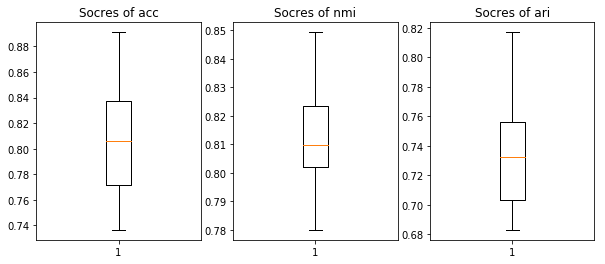

In [13]:
accs, nmis, aris = [], [], []
for _ in range(10):
    cluster = VaDE(
        n_clusters=10, input_dim = 784, hidden_dim = [500, 500, 2000], latent_dim = 10,
        act='relu', epochs=100, pretrain_epochs=100, batch_size=200, lr=0.002,
    )
    scores = cluster.fit(x_train.reshape((len(x_train), -1)), y_train, verbose=0)
    accs.append(scores['acc'])
    nmis.append(scores['nmi'])
    aris.append(scores['ari'])
    elapsed_time = time() - s_time
    print('Elapsed time: {:.3f}, Scores: acc: {:.3f}, nmi: {:.3f}, ari: {:.3f}'.format(
        elapsed_time, scores['acc'], scores['nmi'], scores['ari']))
    result_df = result_df.append(
        {'data': 'mnist', 'model': 'VaDE',
         'acc': scores['acc'], 'nmi': scores['nmi'], 'ari': scores['ari'], 'elapsed_time': elapsed_time
        }, ignore_index=True
    )
show_result(accs, nmis, aris)

# Output result

In [14]:
result_df.to_csv('result.csv', index=False)